# Discrete Fourier Transform (DFT)

In this notebook, we use  $x(t)=\Pi(\frac{t}{4})$ as a discrete-time function and its Fourier transform $X(f)=4 \textrm{sinc}(4f)$ as an example. 

In [1]:
# Load the necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

First, create a pulse function $x(t)$ in discrete time $x_n$ by numpy.

Text(0, 0.5, 'x_n')

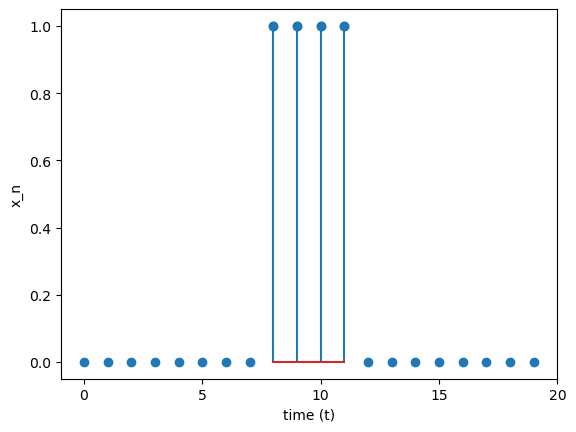

In [2]:
t = np.arange(0,20,1)
xt = np.concatenate((np.zeros(8), np.ones(4), np.zeros(8)))
plt.plot(t, xt,'o')
plt.stem(t[8:12], xt[8:12]) 
plt.xticks(ticks=np.arange(0,21,5), labels=np.arange(0,21,5))
plt.xlabel('time (t)')
plt.ylabel('x_n')

We can use numpy.fft.fft to compute the one-dimensional discrete Fourier Transform of $x_n$.

<StemContainer object of 3 artists>

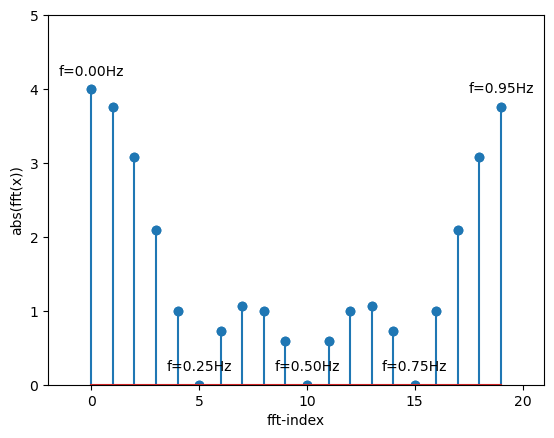

In [3]:
# Plot the DFT. Take the absolute value to avoid not being able to plot complex numbers.
abs_fft = np.abs(np.fft.fft(xt))
plt.plot(t, abs_fft, 'o')

# Add frequency to the plot
freq = np.arange(0, 1, 0.05)
for x,y in zip(t,abs_fft):
    if x%5 == 0 or x==19:
        label = "f={:.2f}Hz".format(freq[x])
        plt.annotate(label, 
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", 
                     xytext=(0,10),
                     fontsize=10,
                     ha='center') 
plt.ylim(0,5)
plt.xlim(-2,21)
plt.xlabel('fft-index')
plt.ylabel('abs(fft(x))')
plt.stem(t, abs_fft)

The spectrum of the sampled signal is periodic in the sampling frequency $f_s$ which equals 1 Hz. Therefore, it is computed just for one period [0,$f_s$). Spectrum are commonly presented and interpreted as double-sided, so in the above graph we can interpret the spectral components with indices 10 to 19 corresponding to negative frequencies. 

<StemContainer object of 3 artists>

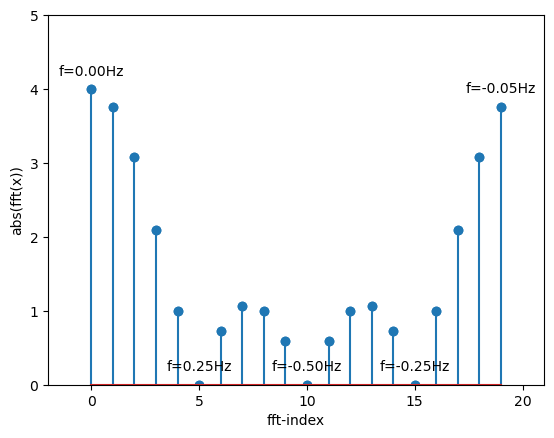

In [4]:
# Plot the DFT. Take the absolute value to avoid not being able to plot complex numbers.
abs_fft = np.abs(np.fft.fft(xt))
plt.plot(t, abs_fft, 'o')

# Add frequency to the plot
freq = np.concatenate((np.arange(0, 0.5, 0.05), np.arange(-0.5, 0, 0.05)))
for x,y in zip(t,abs_fft):
    if x%5 == 0 or x==19:
        label = "f={:.2f}Hz".format(freq[x])
        plt.annotate(label, 
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", 
                     xytext=(0,10),
                     fontsize=10,
                     ha='center') 
plt.ylim(0,5)
plt.xlim(-2,21)
plt.xlabel('fft-index')
plt.ylabel('abs(fft(x))')
plt.stem(t, abs_fft)

Now we can interpret the DFT of the $x(t)=\Pi(\frac{t}{4})$. The sampling interval is $\Delta t$ = 1 second, and the obsesrvation length is T=20 seconds, and we have N=20 samples.  
- We can recognize a bit of a sinc function.
- The DFT is computed from 0 Hz, for positive frequencies up to $\frac{fs}{2} = 0.5$ Hz, after which the negative frequencies follow from -0.5 to -0.05 Hz.
- $X(f)=4 \textrm{sinc}(4f)$ has its first null at $f=0.25$Hz.

For convenient visualization, we may want to shift the negative frequencies to the left-hand side to create a symmetric plot. We can use numpy.fft.fftshift to do that. In other words, the zero-frequency component appears in the center of the spectrum.

Text(0.5, 0, 'frequency [Hz]')

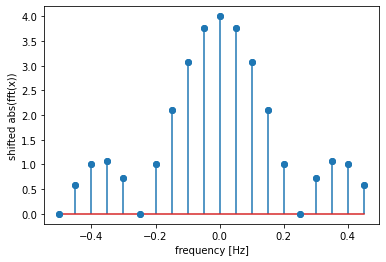

In [5]:
abs_fft_shift = np.abs(np.fft.fftshift(np.fft.fft(xt)))
freq = np.arange(-0.5, 0.5,0.05)
plt.stem(freq, abs_fft_shift)
plt.plot(freq, abs_fft_shift, 'o')
plt.ylabel('shifted abs(fft(x))')
plt.xlabel('frequency [Hz]')